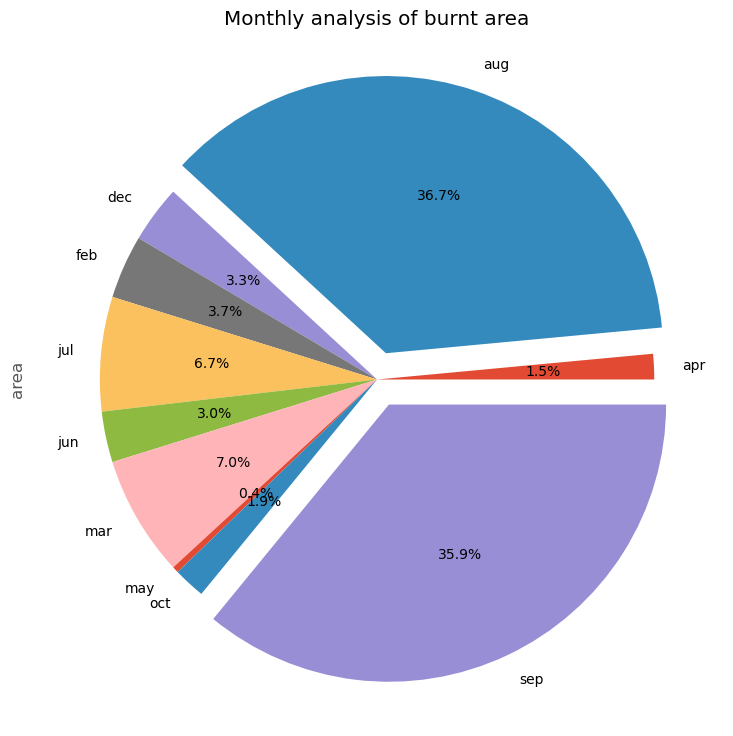

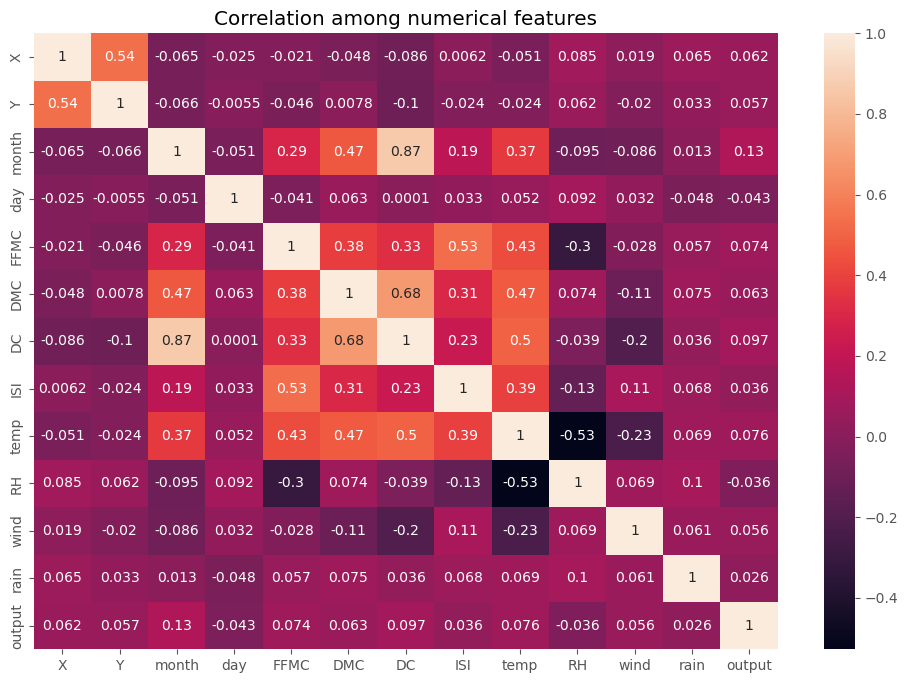

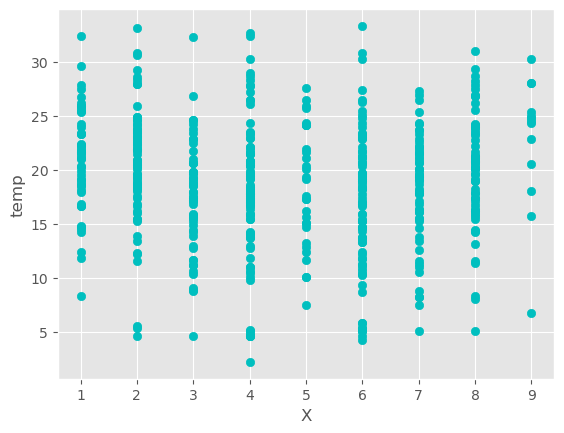

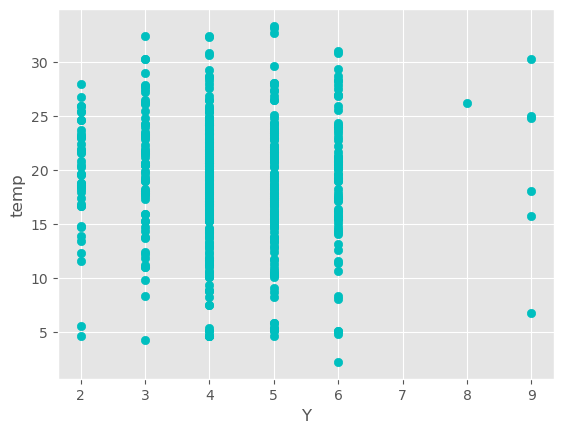

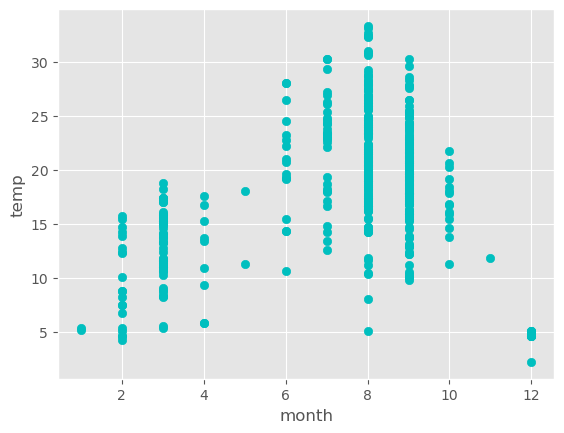

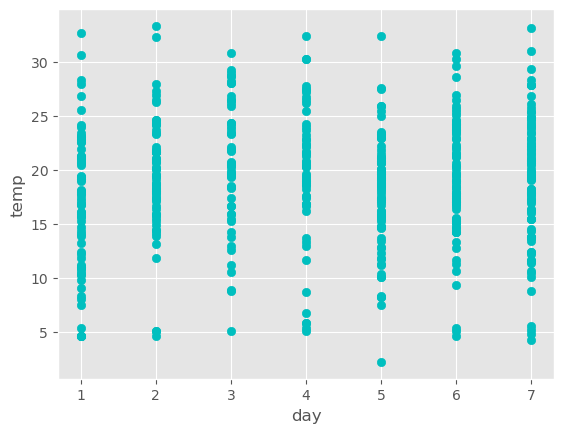

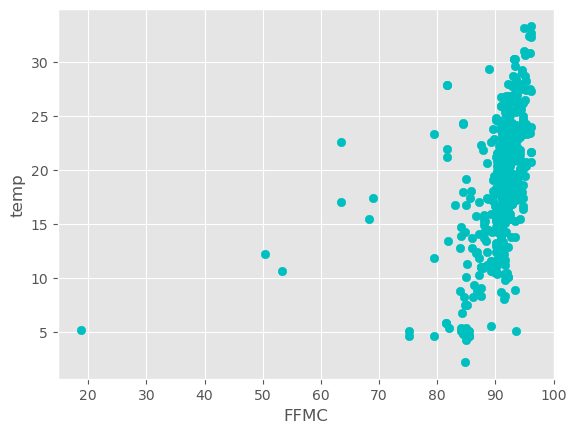

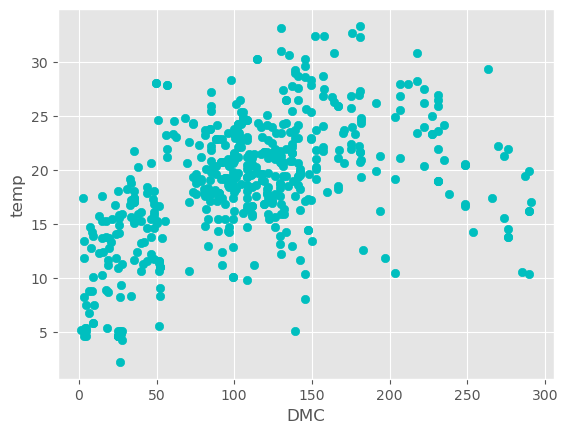

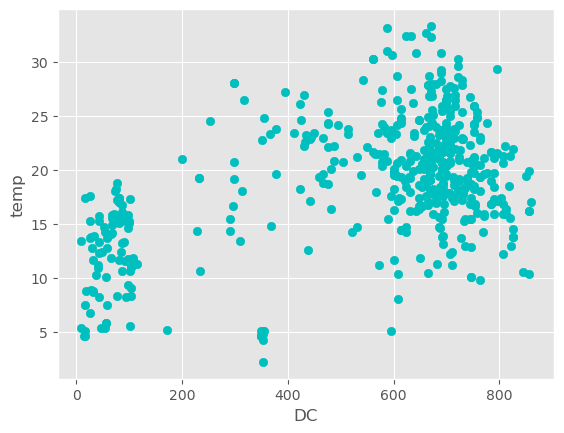

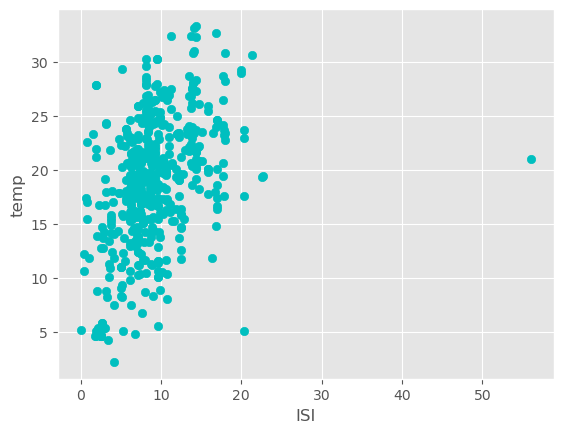

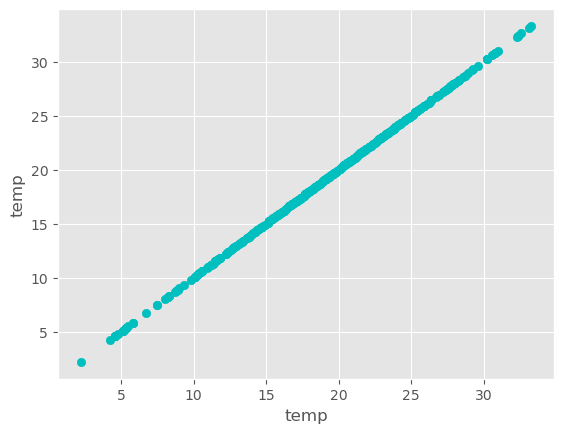

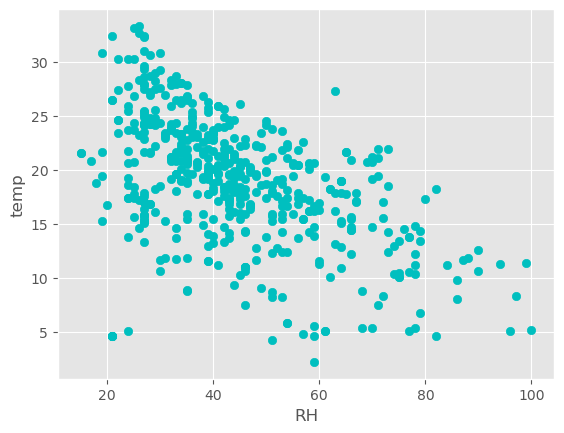

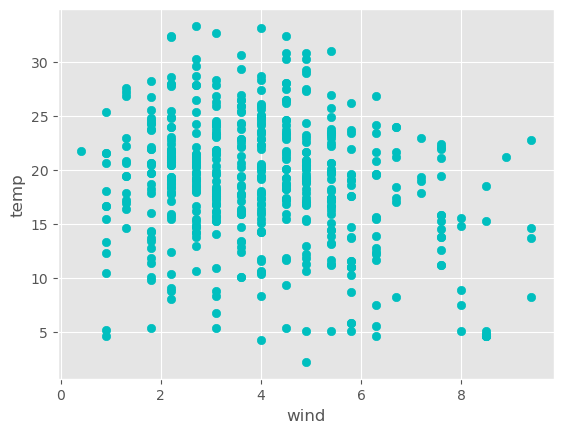

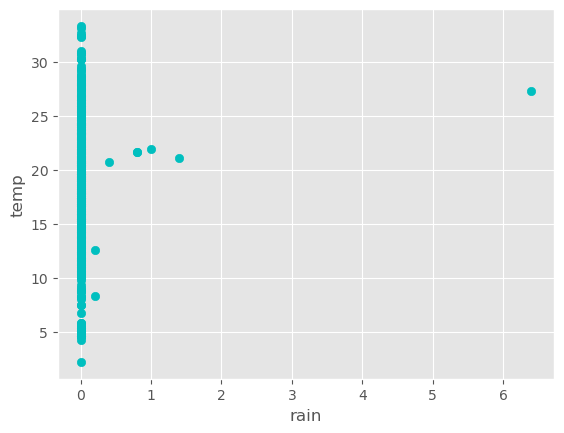

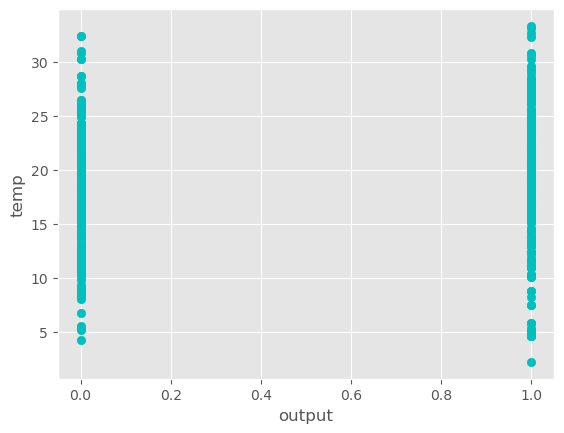

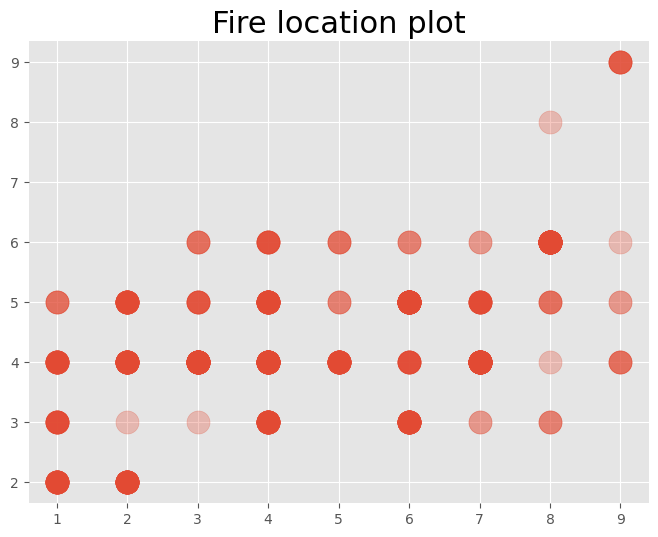

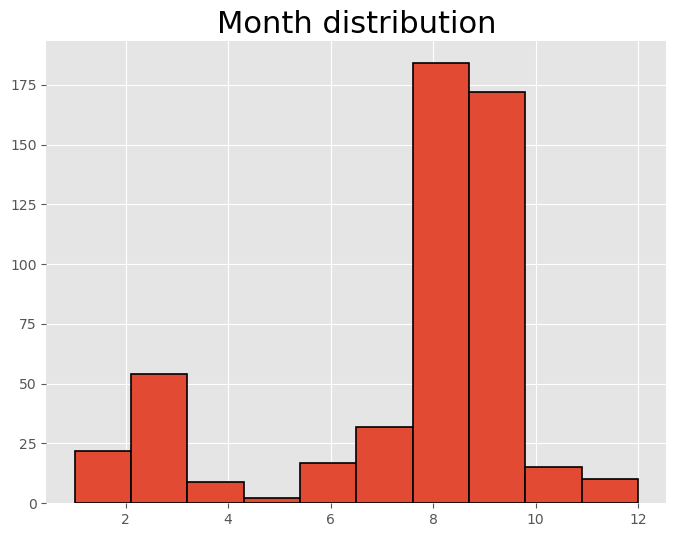

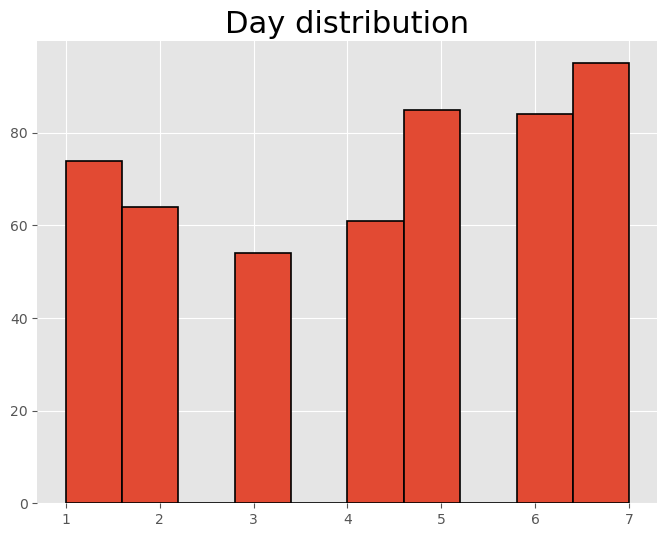

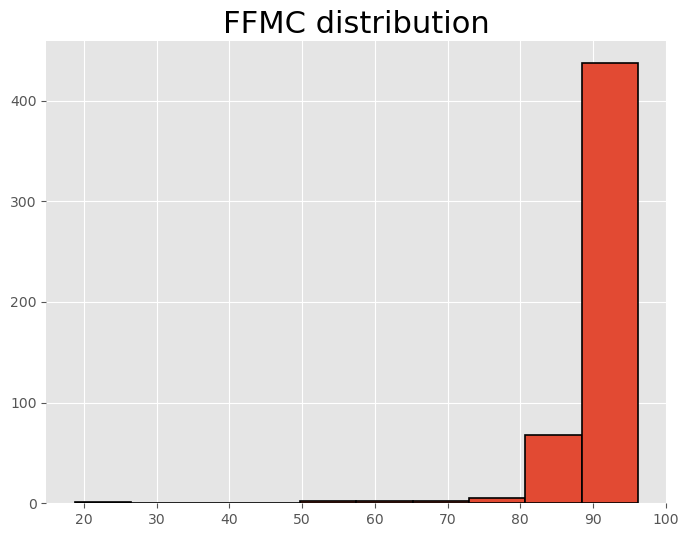

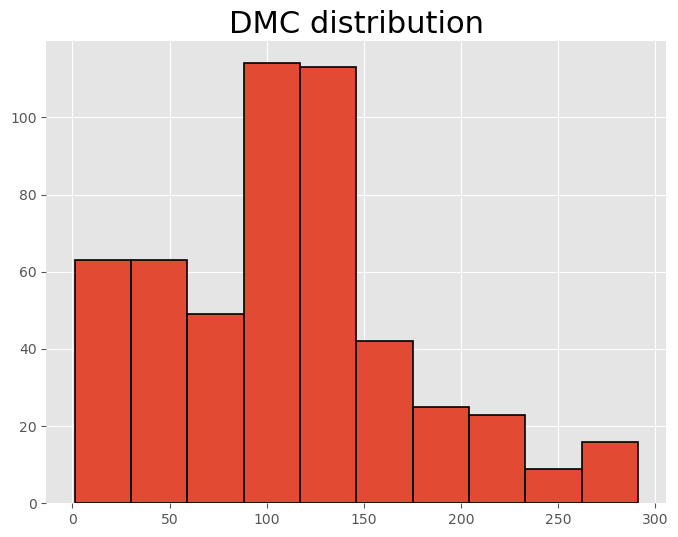

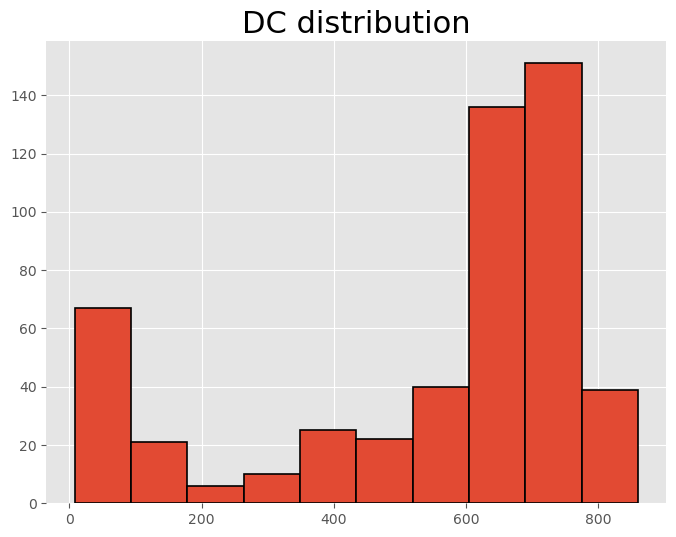

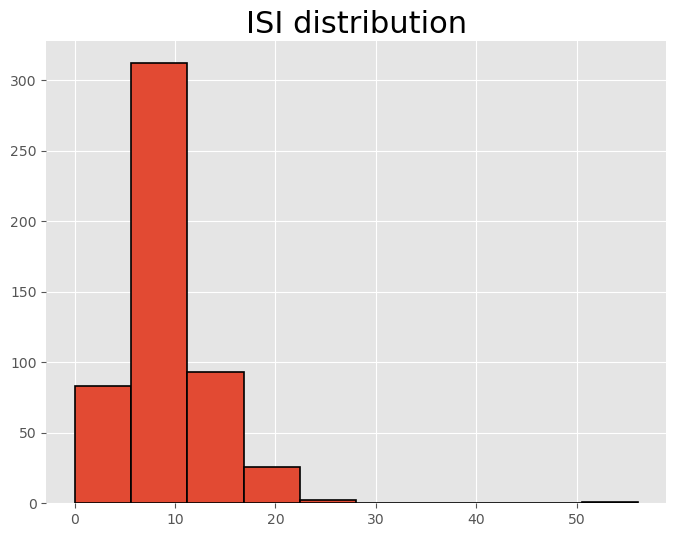

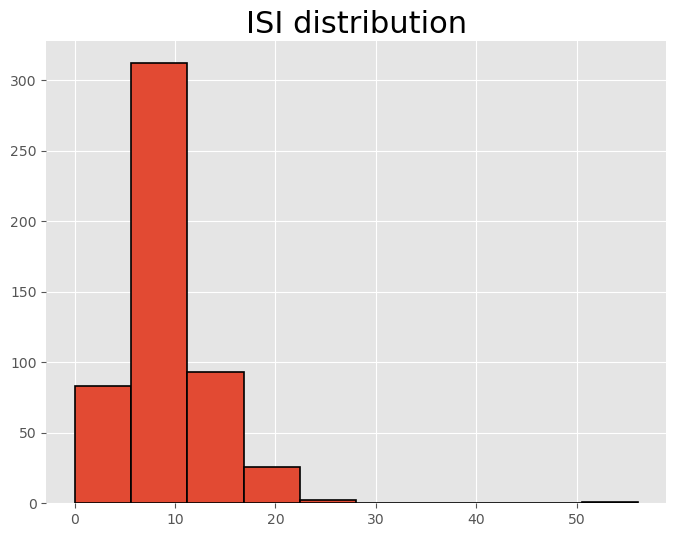

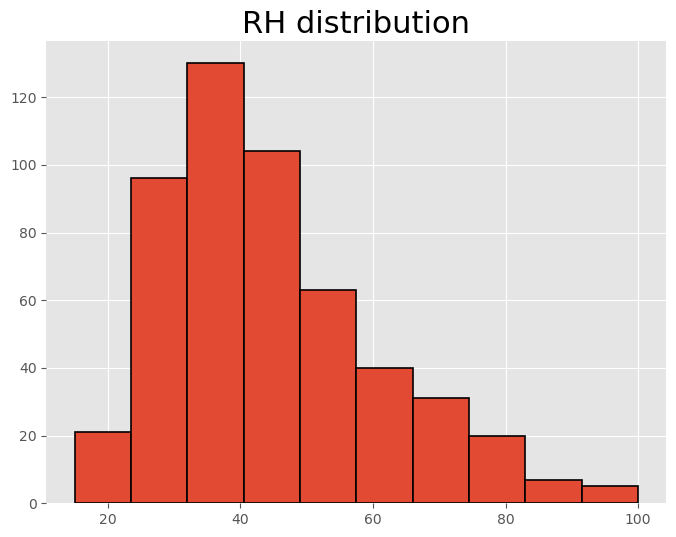

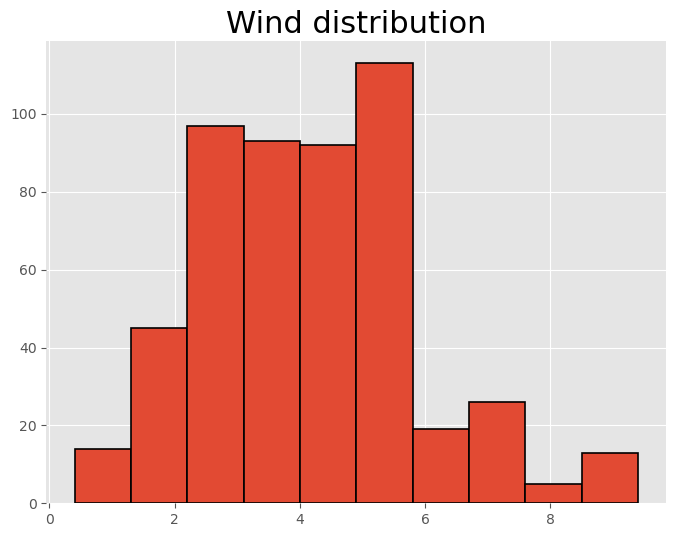

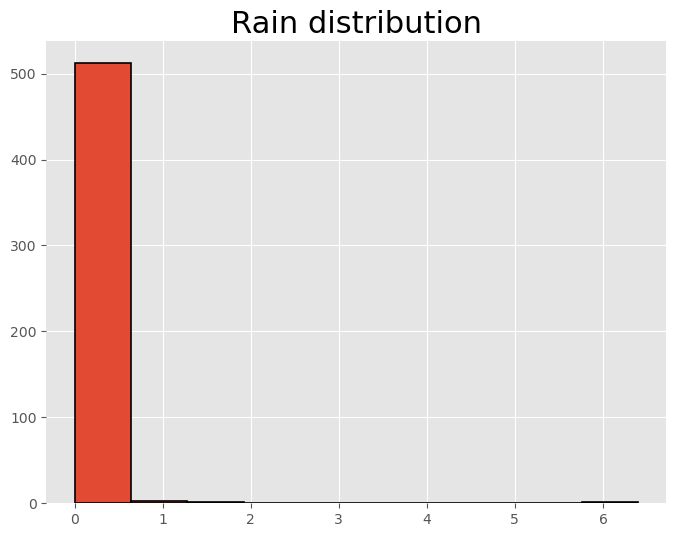

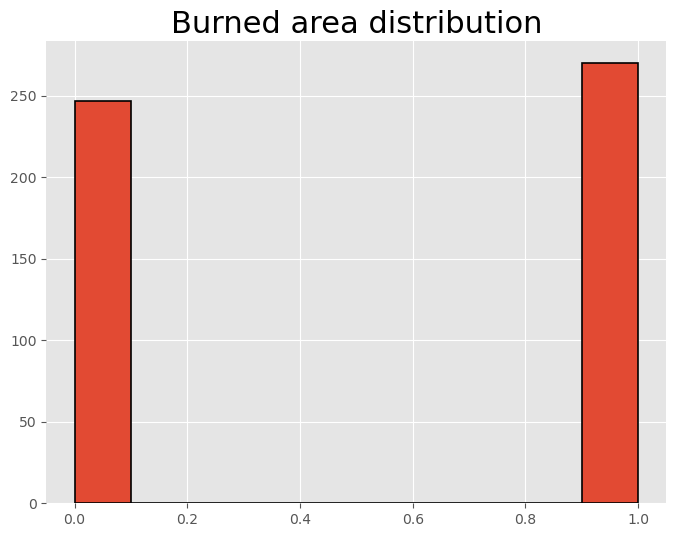

              precision    recall  f1-score   support

         0.0       0.65      0.29      0.40        69
         1.0       0.61      0.87      0.72        87

    accuracy                           0.62       156
   macro avg       0.63      0.58      0.56       156
weighted avg       0.62      0.62      0.58       156

[[20 49]
 [11 76]]
Accuracy: 0.6153846153846154
Precision: 0.608
Recall: 0.8735632183908046
On Fire
              precision    recall  f1-score   support

         0.0       0.46      0.46      0.46        69
         1.0       0.57      0.57      0.57        87

    accuracy                           0.53       156
   macro avg       0.52      0.52      0.52       156
weighted avg       0.53      0.53      0.53       156

[[32 37]
 [37 50]]
Accuracy: 0.5256410256410257
Precision: 0.5747126436781609
Recall: 0.5747126436781609
On Fire
              precision    recall  f1-score   support

         0.0       0.53      0.67      0.59        69
         1.0       0.67 

In [2]:
#Importing libraries
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.metrics import classification_report,confusion_matrix
import warnings
warnings.filterwarnings(action="ignore")
%matplotlib inline
pd.set_option("display.max_rows", 1000) 
pd.set_option("display.max_columns", 1000)
#DATA COLLECTION AND DATA PREPROCESSING 
#Importing dataset
fires=pd.read_csv("forestfires.csv") 
fires
#Removing null values and duplicate values
fires.isnull().sum()
#Monthly analysis of brunt area
areaburnt=fires[fires['area']>0]
areaburnt.groupby('month')['area'].agg('count').plot(kind='pie',title='Monthly analysis of burnt area',figsize=(9,9),explode=[0,0.1,0,0,0,0,0,0,0,0.1],autopct='%0.1f%%')
plt.show()

#changing days into numeric quantity 
fires.day.replace(('mon','tue','wed','thu','fri','sat','sun'),(1,2,3,4,5,6,7), inplace=True)
#changing month into numeric quantity
fires.month.replace(('jan','feb','mar','apr','may','jun','jul','aug','sep','oct','nov','dec'),(1,2,3,4,5,6,7,8,9,10,11,12), inplace=True)
#generate descriptive statistics of each attribute
fires.describe().T
#renaming the area attribute to output for clear understanding
fires['area'].values[fires['area'].values > 0] = 1
fires = fires.rename(columns={'area': 'output'})
fires.head()
#this is the correlation between all data with each other
fires.corr()

import seaborn as sns
plt.style.use('ggplot')
plt.figure(figsize=(12, 8))
sns.heatmap(fires.corr(), annot=True)
plt.title('Correlation among numerical features')
plt.show()


#sorting to see which attribute is correlated more to attribut "output" 
fires.corr()['output'].sort_values()
#find relation between "all data" and"temp"
for i in fires.columns:
    plt.xlabel(i)
    plt.ylabel("temp")
    plt.scatter(fires[i] , fires["temp"] ,color ="c")
    plt.show()
    
#Extracting features from the dataset
x_values = list(fires['X'])
y_values = list(fires['Y'])
loc_values = []
for index in range(0, len(x_values)):
 temp_value = []
 temp_value.append(x_values[index])
 temp_value.append(y_values[index])
 loc_values.append(temp_value)
 month_values = list(fires['month'])
 day_values = list(fires['day'])
 ffmc_values = list(fires['FFMC'])
 dmc_values = list(fires['DMC'])
 dc_values = list(fires['DC'])
 isi_values = list(fires['ISI'])
 temp_values = list(fires['temp'])
 rh_values = list(fires['RH'])
 wind_values = list(fires['wind'])
 rain_values = list(fires['rain'])
 area_values = list(fires['output'])
 attribute_list = []
for index in range(0, len(x_values)):
    temp_list = []
    temp_list.append(x_values[index])
    temp_list.append(y_values[index])
    temp_list.append(month_values[index])
    temp_list.append(day_values[index])
    temp_list.append(ffmc_values[index])
    temp_list.append(dmc_values[index])
    temp_list.append(dc_values[index])
    temp_list.append(isi_values[index])
    temp_list.append(temp_values[index])
    temp_list.append(rh_values[index])
    temp_list.append(wind_values[index])
    temp_list.append(rain_values[index])
    attribute_list.append(temp_list)
#Counting the instances of location points in dataset
def count_points(x_points, y_points, scaling_factor):
    count_array = []
    for index in range(0, len(x_points)):
        temp_value = [x_points[index], y_points[index]]
        count = 0
        for value in loc_values:
            if(temp_value == value):
                count = count + 1
        count_array.append(count * scaling_factor )
        return count_array
#Histogram plotting function for dataset
def histogram_plot(dataset, title):
    plt.figure(figsize=(8, 6))    
    ax = plt.subplot()    
    ax.spines["top"].set_visible(False)    
    ax.spines["bottom"].set_visible(False)    
    ax.spines["right"].set_visible(False)    
    ax.spines["left"].set_visible(False)
    ax.get_xaxis().tick_bottom()
    ax.get_yaxis().tick_left() 
    plt.title(title, fontsize = 22)
    plt.hist(dataset, edgecolor='black', linewidth=1.2)
plt.figure(figsize=(8, 6))    
ax = plt.subplot()    
ax.spines["top"].set_visible(False)    
ax.spines["bottom"].set_visible(False)    
ax.spines["right"].set_visible(False)    
ax.spines["left"].set_visible(False)
ax.get_xaxis().tick_bottom()
ax.get_yaxis().tick_left() 
plt.title("Fire location plot", fontsize = 22)
plt.scatter(x_values, y_values, s = count_points(x_values, y_values, 25), alpha = 0.3)
plt.show()

#Plotting the distribution of values for the dataset
histogram_plot(month_values, title = "Month distribution")
plt.show()

histogram_plot(day_values, title = "Day distribution")
plt.show()

histogram_plot(ffmc_values, title = "FFMC distribution")
plt.show()

histogram_plot(dmc_values, title = "DMC distribution")
plt.show()

histogram_plot(dc_values, title = "DC distribution")
plt.show()

histogram_plot(isi_values, title = "ISI distribution")
plt.show()

histogram_plot(isi_values, title = "ISI distribution")
plt.show()

histogram_plot(rh_values, title = "RH distribution")
plt.show()

histogram_plot(wind_values, title = "Wind distribution")
plt.show()

histogram_plot(rain_values, title = "Rain distribution")
plt.show()

histogram_plot(area_values, title = "Burned area distribution")
plt.show()

from sklearn.preprocessing import StandardScaler
#standardization of data
#removing the mean and scaling it to unit variance
#score=(x-mean)/std
scaler = StandardScaler()
#fitting forest fire dataset to scaler by removing the attribute output
scaler.fit(fires.drop('output',axis=1))
scaled_features = scaler.transform(fires.drop('output',axis=1))
df_feat = pd.DataFrame(scaled_features,columns=fires.columns[:-1])
df_feat.head()
from sklearn.model_selection import train_test_split
X = df_feat
y = fires['output']
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.35,random_state=200)
#BUILDING THE MODEL 
# Support Vector Machine
from sklearn.svm import SVC
# fit a SVM model to the data
X = fires.drop('output', axis=1)
y = fires['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)
svc = SVC()
svc.fit(X_train, y_train)
# make predictions
prediction = svc.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, prediction))
print(metrics.confusion_matrix(y_test, prediction))
print("Accuracy:",metrics.accuracy_score(y_test, prediction))
print("Precision:",metrics.precision_score(y_test, prediction))
print("Recall:",metrics.recall_score(y_test, prediction))
#Prediction using svm
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=svc.predict(x_new)
print(classes[y_predict[0]])
#Decision Tree 
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier
X = fires.drop('output', axis=1)
y = fires['output']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)
d_tree = DecisionTreeClassifier()
d_tree.fit(X_train, y_train)
# make predictions
predicted = d_tree.predict(X_test)
# summarize the fit of the model
print(metrics.classification_report(y_test, predicted))
print(metrics.confusion_matrix(y_test, predicted))

print("Accuracy:",metrics.accuracy_score(y_test, predicted))
print("Precision:",metrics.precision_score(y_test, predicted))
print("Recall:",metrics.recall_score(y_test, predicted))

#prediction using decision tree
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=d_tree.predict(x_new)
print(classes[y_predict[0]])

#Random Forest
from sklearn.ensemble import RandomForestClassifier
X = fires.drop('output', axis=1)
y = fires['output']
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.3,random_state=101)

# fit a Random forest model to the data
random_forest = RandomForestClassifier()
random_forest.fit(X_train,y_train)
# print(random_forest)
# make predictions
predict = random_forest.predict(X_test)

# summarize the fit of the model
print(metrics.classification_report(y_test, predict))
print(metrics.confusion_matrix(y_test, predict))

print("Accuracy:",metrics.accuracy_score(y_test, predict))
print("Precision:",metrics.precision_score(y_test, predict))
print("Recall:",metrics.recall_score(y_test, predict))

#prediction using random forest
classes={0:'safe',1:'On Fire'}
x_new=[[1, 4, 9 ,1 ,91.5, 130.1, 807.1, 7.5, 21.3, 35, 2.2, 0]]
y_predict=random_forest.predict(x_new)
print(classes[y_predict[0]])-